In [3]:
!pip install pennylane

In [4]:
import time
import numpy as np
import networkx as nx
import pennylane as qml

# Define your AGN graph structure
G = nx.hexagonal_lattice_graph(3, 3)
nx.set_node_attributes(G, values=0, name="state")

# Define the quantum device and circuit
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def quantum_decision_circuit(theta):
    qml.RX(theta[0], wires=0)
    qml.RY(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(theta[2], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.RX(theta[3], wires=3)
    return qml.probs(wires=[0, 1, 2, 3])

@qml.qnode(dev)
def complex_quantum_circuit(theta):
    qml.Hadamard(wires=0)
    qml.RX(theta[0], wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(theta[1], wires=1)
    qml.CRX(theta[2], wires=1, control=0)
    qml.T(wires=2)
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

# Define benchmarking function
def run_benchmark(iterations=100):
    total_time = 0
    for _ in range(iterations):
        # Generate random theta values for the quantum circuit
        theta = np.random.rand(4)
        
        # Start timing
        start_time = time.time()
        
        # Run quantum circuit
        probabilities = quantum_decision_circuit(theta)
        
        # Map probabilities to AGN nodes
        for i, node in enumerate(G.nodes()):
            G.nodes[node]["state"] = probabilities[i % len(probabilities)]
        
        # End timing
        end_time = time.time()
        
        # Calculate time for this iteration
        total_time += (end_time - start_time)
    
    avg_time = total_time / iterations
    print(f"Average execution time per iteration: {avg_time:.4f} seconds")

# Run the benchmark
run_benchmark()

Average execution time per iteration: 0.0012 seconds


Padded Data:
 [[0.89209269 0.65063517 0.66753295 0.        ]
 [0.06997607 0.50499087 0.80499266 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Running benchmark with simple circuit:
Average execution time per iteration: 0.0010 seconds


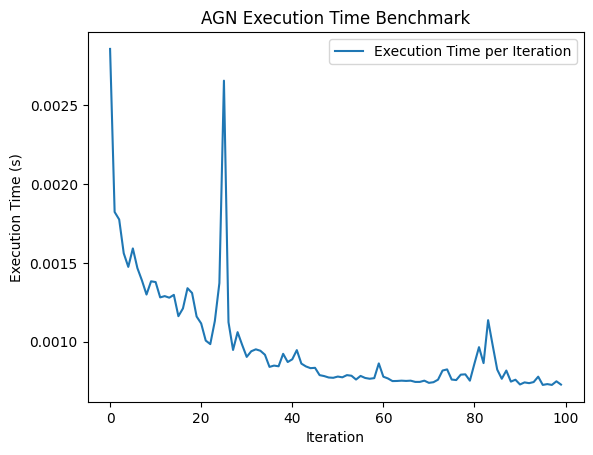


Running benchmark with complex circuit:
Average execution time per iteration: 0.0010 seconds


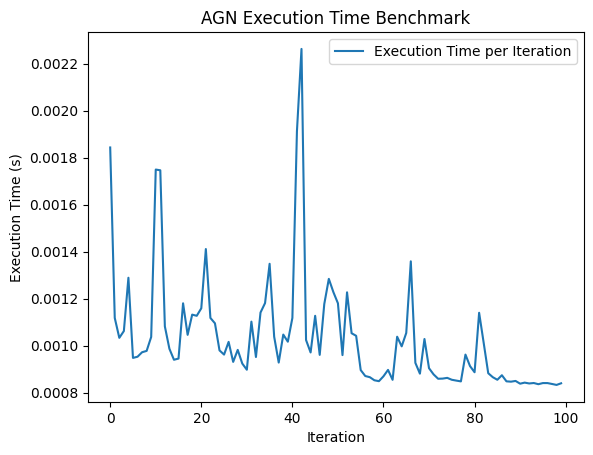

In [6]:
import time
import numpy as np
import networkx as nx
import pennylane as qml
import matplotlib.pyplot as plt

# Define your AGN graph structure
G = nx.hexagonal_lattice_graph(3, 3)  # Adjust dimensions as needed for scalability
nx.set_node_attributes(G, values=0, name="state")  # Initialize node states

# Define the quantum device and circuits
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def quantum_decision_circuit(theta):
    qml.RX(theta[0], wires=0)
    qml.RY(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(theta[2], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.RX(theta[3], wires=3)
    return qml.probs(wires=[0, 1, 2, 3])

@qml.qnode(dev)
def complex_quantum_circuit(theta):
    qml.Hadamard(wires=0)
    qml.RX(theta[0], wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(theta[1], wires=1)
    qml.CRX(theta[2], wires=[0, 1])  # Control qubit is 0, target qubit is 1
    qml.T(wires=2)
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

# Define tensor padding function
def pad_tensor(tensor, target_shape, pad_value=0):
    original_shape = tensor.shape
    padded_tensor = np.full(target_shape, pad_value, dtype=tensor.dtype)
    slices = tuple(slice(0, min(original_shape[dim], target_shape[dim])) for dim in range(len(target_shape)))
    padded_tensor[slices] = tensor
    return padded_tensor

# Define benchmarking function with data collection for analysis
def run_benchmark(iterations=100, use_complex_circuit=False):
    exec_times = []
    for _ in range(iterations):
        # Generate random theta values for the quantum circuit
        theta = np.random.rand(4)
        
        # Select circuit to run based on the argument
        circuit = complex_quantum_circuit if use_complex_circuit else quantum_decision_circuit
        
        # Start timing
        start_time = time.time()
        
        # Run the selected quantum circuit
        probabilities = circuit(theta)
        
        # Map probabilities to AGN nodes
        for i, node in enumerate(G.nodes()):
            G.nodes[node]["state"] = probabilities[i % len(probabilities)]
        
        # End timing
        end_time = time.time()
        
        # Calculate time for this iteration and store it
        exec_times.append(end_time - start_time)
    
    avg_time = np.mean(exec_times)
    print(f"Average execution time per iteration: {avg_time:.4f} seconds")
    
    # Plot execution times for each iteration
    plt.plot(range(iterations), exec_times, label="Execution Time per Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Execution Time (s)")
    plt.title("AGN Execution Time Benchmark")
    plt.legend()
    plt.show()

# Example usage of padding with real-time data
real_time_data = np.random.rand(2, 3)  # Simulate variable input size
padded_data = pad_tensor(real_time_data, (4, 4))
print("Padded Data:\n", padded_data)

# Run the benchmark with the simple circuit
print("Running benchmark with simple circuit:")
run_benchmark(iterations=100, use_complex_circuit=False)

# Run the benchmark with the complex circuit
print("\nRunning benchmark with complex circuit:")
run_benchmark(iterations=100, use_complex_circuit=True)

In [7]:
# Create a larger AGN graph structure for scalability testing
G_large = nx.hexagonal_lattice_graph(5, 5)  # Try a 5x5 hexagonal lattice
nx.set_node_attributes(G_large, values=0, name="state")  # Initialize node states to 0



In [8]:
noise_dev = qml.device("default.mixed", wires=4)

@qml.qnode(noise_dev)
def noisy_quantum_circuit(theta):
    qml.RX(theta[0], wires=0)
    qml.DepolarizingChannel(0.1, wires=0)  # Add depolarizing noise
    qml.RY(theta[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(theta[2], wires=2)
    qml.DepolarizingChannel(0.05, wires=2)
    qml.CNOT(wires=[1, 2])
    qml.RX(theta[3], wires=3)
    return qml.probs(wires=[0, 1, 2, 3])

In [9]:
# Define a more complex quantum circuit with additional qubits and gates
dev_extended = qml.device("default.qubit", wires=6)

@qml.qnode(dev_extended)
def extended_quantum_circuit(theta):
    qml.Hadamard(wires=0)
    qml.CRX(theta[0], wires=[0, 1])
    qml.CRY(theta[1], wires=[1, 2])
    qml.CZ(wires=[2, 3])
    qml.RZ(theta[2], wires=4)
    qml.CNOT(wires=[4, 5])
    return qml.probs(wires=[0, 1, 2, 3, 4, 5])

In [10]:
def run_consistency_test(theta_values, expected_outcome, iterations=100):
    consistent_count = 0
    for _ in range(iterations):
        result = quantum_decision_circuit(theta_values)
        decision = np.argmax(result)
        if decision == expected_outcome:
            consistent_count += 1
    
    consistency_rate = (consistent_count / iterations) * 100
    print(f"Consistency Rate: {consistency_rate:.2f}%")

In [29]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-ibmq-provider


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.7 MB/s eta 0:00:00a 0:00:01


In [3]:
from qiskit import QuantumCircuit
from qiskit.execute_function import execute
from qiskit.providers.ibmq import IBMQ
from qiskit_aer import Aer

IBMQ.save_account('86a3bf838145fe6863cd15adf39b4678715f07c28e66cf2e1e3c7a9f9020a4f4215b71b9c664db90690e99ed2760c6e973c993257ace55c7ae6d5dfacd2d13fc')



# Save your IBMQ account credentials (only needs to be done once)
# Replace 'YOUR_API_TOKEN' with your actual IBM Quantum Experience API token
IBMQ.save_account('86a3bf838145fe6863cd15adf39b4678715f07c28e66cf2e1e3c7a9f9020a4f4215b71b9c664db90690e99ed2760c6e973c993257ace55c7ae6d5dfacd2d13fc')

# Load IBMQ account and select backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend('ibm_brisbane')

# Define a simple Qiskit quantum circuit
def qiskit_circuit(theta):
    qc = QuantumCircuit(4)
    qc.rx(theta[0], 0)
    qc.ry(theta[1], 1)
    qc.cx(0, 1)
    qc.ry(theta[2], 2)
    qc.cx(1, 2)
    qc.rx(theta[3], 3)
    qc.measure_all()
    return qc

# Run on IBM Q backend
theta_values = [0.3, 0.7, 1.2, 0.5]
qc = qiskit_circuit(theta_values)
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Qiskit simulation results:", counts)

# Optionally, run on Aer simulator
aer_backend = Aer.get_backend('qasm_simulator')
aer_job = execute(qc, aer_backend, shots=1024)
aer_result = aer_job.result()
aer_counts = aer_result.get_counts(qc)
print("Aer simulation results:", aer_counts)

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [4]:
from qiskit.providers.ibmq import IBMQ



IBMQ.save_account('86a3bf838145fe6863cd15adf39b4678715f07c28e66cf2e1e3c7a9f9020a4f4215b71b9c664db90690e99ed2760c6e973c993257ace55c7ae6d5dfacd2d13fc')


# Load account and check available backends
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
print(provider.backends())

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [35]:
from qiskit import QuantumCircuit
from qiskit.execute_function import execute
from qiskit.providers.ibmq import IBMQ
from qiskit.tools.monitor import job_monitor

# Load IBMQ account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# Choose the 'ibm_brisbane' backend
backend = provider.get_backend('ibm_brisbane')

# Define a simple Qiskit quantum circuit
def qiskit_circuit(theta):
    qc = QuantumCircuit(4)
    qc.rx(theta[0], 0)
    qc.ry(theta[1], 1)
    qc.cx(0, 1)
    qc.ry(theta[2], 2)
    qc.cx(1, 2)
    qc.rx(theta[3], 3)
    qc.measure_all()
    return qc

# Run on IBM Q backend
theta_values = [0.3, 0.7, 1.2, 0.5]
qc = qiskit_circuit(theta_values)
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Qiskit simulation results:", counts)

# Optionally, run on Aer simulator
aer_backend = Aer.get_backend('qasm_simulator')
aer_job = execute(qc, aer_backend, shots=1024)
aer_result = aer_job.result()
aer_counts = aer_result.get_counts(qc)
print("Aer simulation results:", aer_counts)

ibmqfactory.load_account:WARNING:2024-11-01 20:26:27,158: Credentials are already in use. The existing account in the session will be replaced.
/var/folders/11/rgx5c08d3v573lbh0msqtrqw0000gp/T/ipykernel_9370/2896483965.py:11: DeprecationWarning: The method ``qiskit.providers.provider.ProviderV1.get_backend()`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will  be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.
  backend = provider.get_backend('ibm_brisbane')
/var/folders/11/rgx5c08d3v573lbh0msqtrqw0000gp/T/ipykernel_9370/2896483965.py:28: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qi

RequestsApiError: '400 Client Error: Bad Request for url: https://api.quantum.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/devices/ibm_brisbane/properties?version=1. qiskit-ibmq-provider is no longer supported. Refer to the migration guide at https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime-from-ibmq-provider for instructions on how to migrate existing code to Qiskit Runtime primitives., Error code: 2418.'

In [31]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Initialize the Qiskit Runtime service
service = QiskitRuntimeService(channel="ibm_quantum")

# Define a simple quantum circuit
def qiskit_circuit(theta):
    qc = QuantumCircuit(4)
    qc.rx(theta[0], 0)
    qc.ry(theta[1], 1)
    qc.cx(0, 1)
    qc.ry(theta[2], 2)
    qc.cx(1, 2)
    qc.rx(theta[3], 3)
    qc.measure_all()
    return qc

# Define theta values and create the circuit
theta_values = [0.3, 0.7, 1.2, 0.5]
qc = qiskit_circuit(theta_values)

# Use the Sampler primitive to run the circuit on ibm_brisbane
with Sampler(session=service) as sampler:
    job = sampler.run(circuits=qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Results from ibm_brisbane using Qiskit Runtime Sampler:", counts)

ImportError: cannot import name 'PrimitiveResult' from 'qiskit.primitives' (/Users/callum/Git/ActiveGraphNetworks/.venv/lib/python3.10/site-packages/qiskit/primitives/__init__.py)

In [32]:
!pip install --upgrade qiskit qiskit-ibm-runtime

In [2]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Initialize the Qiskit Runtime service
service = QiskitRuntimeService(channel="ibm_quantum")

# Define a simple quantum circuit
def qiskit_circuit(theta):
    qc = QuantumCircuit(4)
    qc.rx(theta[0], 0)
    qc.ry(theta[1], 1)
    qc.cx(0, 1)
    qc.ry(theta[2], 2)
    qc.cx(1, 2)
    qc.rx(theta[3], 3)
    qc.measure_all()
    return qc

# Define theta values and create the circuit
theta_values = [0.3, 0.7, 1.2, 0.5]
qc = qiskit_circuit(theta_values)

# Use the Sampler primitive to run the circuit on ibm_brisbane
with Sampler(session=service) as sampler:
    job = sampler.run(circuits=qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Results from ibm_brisbane using Qiskit Runtime Sampler:", counts)

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [1]:
import csv

IBMQ.save_account('86a3bf838145fe6863cd15adf39b4678715f07c28e66cf2e1e3c7a9f9020a4f4215b71b9c664db90690e99ed2760c6e973c993257ace55c7ae6d5dfacd2d13fc')


def log_execution_time(execution_time, file_name="benchmark_log.csv"):
    with open(file_name, mode='a') as file:
        writer = csv.writer(file)
        writer.writerow([execution_time])

# Example of logging execution time within the benchmark function
def run_benchmark_with_logging(iterations=100):
    total_time = 0
    for _ in range(iterations):
        theta = np.random.rand(4)
        start_time = time.time()
        probabilities = quantum_decision_circuit(theta)
        end_time = time.time()
        exec_time = end_time - start_time
        total_time += exec_time
        log_execution_time(exec_time)  # Log each execution time
    
    avg_time = total_time / iterations
    print(f"Average execution time per iteration: {avg_time:.4f} seconds")

NameError: name 'IBMQ' is not defined

In [37]:
pip install -U qiskit qiskit-ibm-runtime

Note: you may need to restart the kernel to use updated packages.
